In [43]:
import pandas as pd
import json
df = pd.read_json('../data/output.json')

df.head(10)


,exception,regex,inputPairs,outputExceptionStackTrace,inputExceptionStackTrace
0,False,Transform\._handle,"[{'input': 'Transform._handle', 'match': True}]",None,None
1,False,(?<!\\)(\$|\\),"[{'input': '\', 'match': True}, {'input': '$',...",None,None
2,False,_mmaCalendar,"[{'input': '_mmaCalendar', 'match': True}]",None,None
3,False,.*?/projects/(.*?)/zones/(.*?)/instances/(.*),[{'input': 'evil/projects/evil/zones/evil/inst...,None,None
4,False,"##FORMAT=<ID=([^,]+),Number=([^,]+),Type=([^,]...","[{'input': '##FORMAT=<ID=evil,Number=evil,Type...",None,None
5,False,Attempt to override an already evaluated resou...,[{'input': 'Attempt to override an already eva...,None,None
6,False,Category:\s*,"[{'input': 'Category: ', 'match': True}, {'in...",None,None
7,False,Windows|mswin,"[{'input': 'mswin', 'match': True}, {'input': ...",None,None
8,False,PatchPerl\.pm,"[{'input': 'PatchPerl.pm', 'match': True}]",None,None
9,False,o[iu]s$,"[{'input': 'ois', 'match': True}, {'input': 'o...",None,None


In [44]:
exceptions = df['exception']==True

exceptionsDf = df[exceptions]

exceptionsDf.head(100)


,exception,regex,inputPairs,outputExceptionStackTrace,inputExceptionStackTrace
10,True,None,None,{'message': 'Invalid pattern '\u{1D306}' at of...,"{'exceptionThrownBy': 'Python', 'exception': '..."
17,True,None,None,{'message': 'Invalid pattern '\$\Q$k\E' at off...,"{'exceptionThrownBy': 'Python', 'exception': '..."
30,True,None,None,{'message': 'Invalid pattern ' `[^`]*? #...,"{'exceptionThrownBy': 'Python', 'exception': '..."
159,True,None,None,{'message': 'Invalid pattern '#.*\Q$keyword\E ...,"{'exceptionThrownBy': 'Python', 'exception': '..."
164,True,None,None,{'message': 'Invalid pattern 'DeviceID: (?P<de...,None
...,...,...,...,...,...
2735,True,None,None,{'message': 'Invalid pattern '^Seat (?P<seat>\...,None
2807,True,None,None,{'message': 'Invalid pattern '(?P<nature2> (co...,None
2859,True,None,None,{'message': 'Invalid pattern 'script\_cve\_id\...,None
2892,True,None,None,{'message': 'Invalid pattern '(?P<cuda>cuda\d+...,None


In [45]:
exceptionsDf = pd.json_normalize(exceptionsDf.outputExceptionStackTrace)

exceptionsDf.head()


,message,regex,source,category
0,Invalid pattern '\u{1D306}' at offset 3. Insuf...,\u{1D306},System.Text.RegularExpressions,Insufficient hexadecimal digits.
1,Invalid pattern '\$\Q$k\E' at offset 4. Unreco...,\$\Q$k\E,System.Text.RegularExpressions,Unrecognized escape sequence \\Q.
2,Invalid pattern '\n `[^`]*? # The opening...,\n `[^`]*? # The opening backtick on a pl...,System.Text.RegularExpressions,Not enough )'s.
3,Invalid pattern '#.*\Q$keyword\E isa ($CLASS)'...,#.*\Q$keyword\E isa ($CLASS),System.Text.RegularExpressions,Unrecognized escape sequence \\Q.
4,Invalid pattern 'DeviceID: (?P<deviceID>[0-9]+...,DeviceID: (?P<deviceID>[0-9]+),System.Text.RegularExpressions,Unrecognized grouping construct.


<AxesSubplot:>

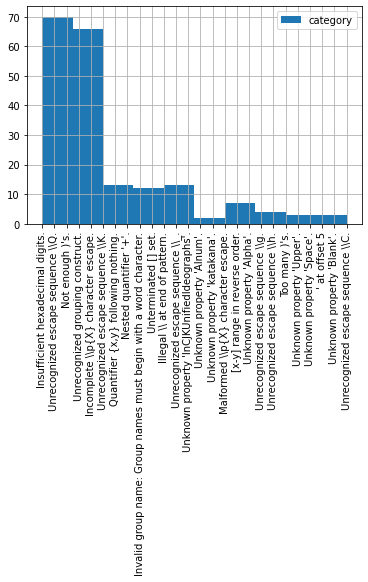

In [51]:
exceptionsDf['category'].hist(legend=True, xrot=90)


<AxesSubplot:ylabel='match_type'>

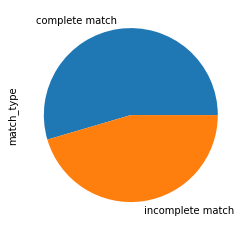

In [90]:


def return_match_type(row):
    match_counter = 0
    
    if row.inputPairs and len(row.inputPairs) > 0: 
        total_rows = len(row.inputPairs)
        for pair in row.inputPairs:
            if pair['match'] and pair['match'] == True:
                match_counter = match_counter + 1
        if total_rows == match_counter:
            return 'complete match'
        else:
            return 'incomplete match'
    else:
        return None

df['match_type'] = df.apply (lambda row: return_match_type(row), axis=1)

df['match_type'].value_counts().plot.pie()